## Import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import ensemble
from sklearn import gaussian_process
from sklearn import linear_model
from sklearn import naive_bayes
from sklearn import neighbors
from sklearn import svm
from sklearn import tree
from sklearn import discriminant_analysis
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

import xgboost as xgb
from xgboost import XGBClassifier
MLA = [
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),
    gaussian_process.GaussianProcessClassifier(),
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(), 
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    neighbors.KNeighborsClassifier(), 
    svm.SVC(probability=True),
    #svm.NuSVC(probability=True),
    svm.LinearSVC(), 
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),
    XGBClassifier()
       ] 

import warnings
warnings.filterwarnings('ignore')

## Read data

In [3]:
df = pd.read_csv('E:/Experiments/PeilunHan/TOF/run/TOF.csv',encoding='gbk')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 53 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                108 non-null    int64  
 1   age               108 non-null    float64
 2   sex               108 non-null    int64  
 3   PE                108 non-null    int64  
 4   Cyanotic          108 non-null    int64  
 5   squatting         108 non-null    int64  
 6   SOB               108 non-null    int64  
 7   cardiacsympotoms  108 non-null    int64  
 8   chesttightness    108 non-null    int64  
 9   syncope           108 non-null    int64  
 10  height            108 non-null    float64
 11  weight            108 non-null    float64
 12  BMI               108 non-null    float64
 13  BSA               108 non-null    float64
 14  HR                101 non-null    float64
 15  SBP               105 non-null    float64
 16  DBP               105 non-null    float64
 1

In [4]:
df.head()

,ID,age,sex,PE,Cyanotic,squatting,SOB,cardiacsympotoms,chesttightness,syncope,...,PVT,PVS,AVT,APVC,DSVC,LBV,s1,s2,s3,s4
0,1,7.00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,3
1,2,8.00,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,1,3
2,3,2.00,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,3
3,4,11.00,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0.75,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#df.fillna(0)

In [6]:
#df.notnull()

In [7]:
df1 = df.dropna(axis=0)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 107
Data columns (total 53 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                99 non-null     int64  
 1   age               99 non-null     float64
 2   sex               99 non-null     int64  
 3   PE                99 non-null     int64  
 4   Cyanotic          99 non-null     int64  
 5   squatting         99 non-null     int64  
 6   SOB               99 non-null     int64  
 7   cardiacsympotoms  99 non-null     int64  
 8   chesttightness    99 non-null     int64  
 9   syncope           99 non-null     int64  
 10  height            99 non-null     float64
 11  weight            99 non-null     float64
 12  BMI               99 non-null     float64
 13  BSA               99 non-null     float64
 14  HR                99 non-null     float64
 15  SBP               99 non-null     float64
 16  DBP               99 non-null     float64
 17

## 1-49 are X，s1-s4 are four y

## For S1

In [8]:
class_mapping = {label: idx for idx, label in enumerate(np.unique(df1['s1']))} 
class_mapping

{0: 0, 1: 1}

In [9]:
from sklearn.preprocessing import LabelEncoder
df1['s1'] = df1['s1'].map(class_mapping)
y1 = LabelEncoder().fit_transform(df1['s1'].values)
X = df1.iloc[:, 1:49].values
print(y1.shape)
print(X.shape)

(99,)
(99, 48)


In [10]:
feat_labels = df1.columns[1:49]

1    77
0    22
Name: s1, dtype: int64


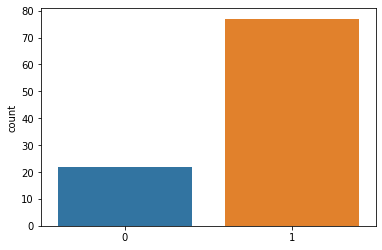

In [11]:
import seaborn as sns
ax = sns.countplot(x=y1, data=df1)
print(df1['s1'].value_counts())
#plt.savefig('s1-1.jpg',dpi=1200)
plt.show()

In [12]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_std = stdsc.fit_transform(X)
print(X_std.shape)

(99, 48)


### Then, do feature selection and modeling

Accuracy: 100.00 % 


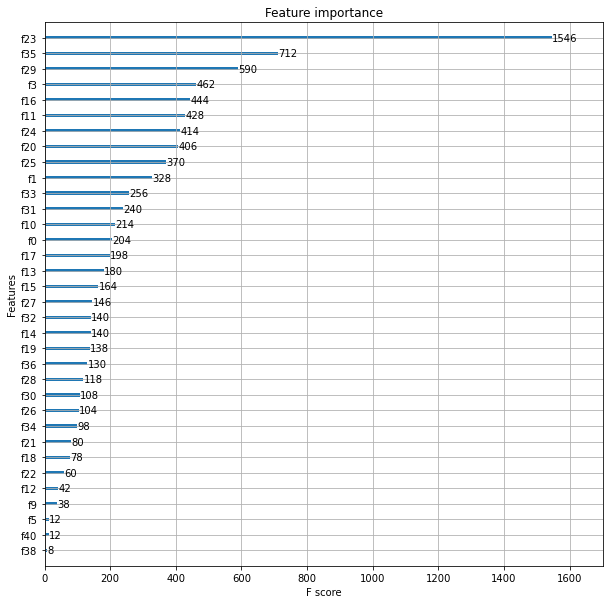

In [13]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
# set XGBoost's parameters
params = {
    'booster': 'gbtree',
    #'objective': 'binary:hinge',  #'binary:logistic', 
    'objective':'multi:softmax',
    'eval_metric':'auc',
    'num_class': 2, 
    #'gamma': 0.1,
    'max_depth': 10,
    #'alpha':1,
    'lambda': 1,
    #'subsample': 1,
    #'colsample_bytree': 1,
    #'min_child_weight': 3,
    #'scale_pos_weight':4,
    #'silent': 1,
    'eta': 0.01,
    'seed': 100,
    #'nthread': 4,    
}

plst = params.items()
# trian
dtrain = xgb.DMatrix(X_std, y1)
num_rounds = 500
model = xgb.train(plst, dtrain, num_rounds)

# test
dtest = xgb.DMatrix(X_std)
ans = model.predict(dtest)

# calculate
cnt1 = 0
cnt2 = 0
for i in range(len(y1)):
    if ans[i] == y1[i]:
        cnt1 += 1
    else:
        cnt2 += 1

print("Accuracy: %.2f %% " % (100 * cnt1 / (cnt1 + cnt2)))

# show the importance, for feature selection
xgb.plot_importance(model, importance_type='weight')
#plt.savefig('fig2-new.jpg',dpi=1200)
plt.show()

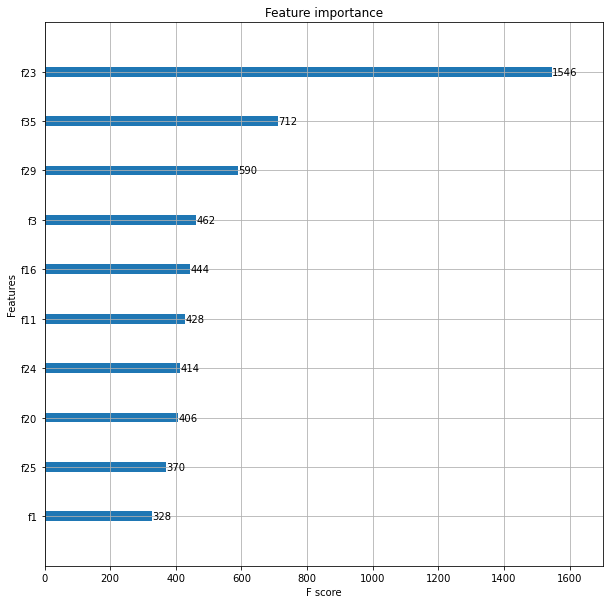

In [14]:
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
xgb.plot_importance(model,max_num_features=10, importance_type='weight') #or gain, cover.
#plt.savefig('s1-2.jpg',dpi=1200)
#plt.show()

In [15]:
feat_labels[[23,35,29,3,16,11,24,20,25,1]]

Index(['rvotL', 'RVW', 'RV L', 'Cyanotic', 'PA', 'BMI', 'rvotS', 'SRPA', 'VSD',
       'sex'],
      dtype='object')

In [16]:
X1 = X_std[:, [23,35,29,3,16,11,24,20,25,1]]
y1 = y1
print(X1.shape)
print(y1.shape)

(99, 10)
(99,)


### Using SVM

In [17]:
clf1 = svm.SVC(probability=True, random_state=1)

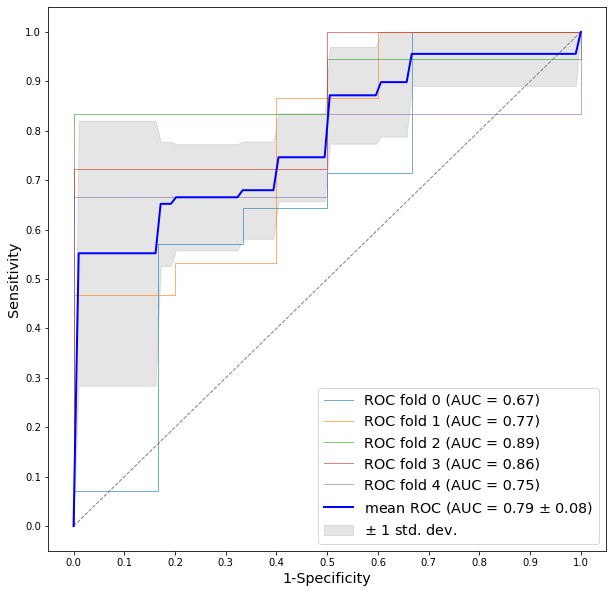

In [18]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import model_selection
from scipy import interp
import matplotlib
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import auc, f1_score, roc_auc_score, roc_curve
from pylab import rcParams

cv = model_selection.ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 1)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
i = 0
plt.xticks(np.arange(0, 1.1, step=0.1))
plt.yticks(np.arange(0, 1.1, step=0.1))
matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)

for train, test in cv.split(X1, y1):
    probas_ = clf1.fit(X1[train], y1[train]).predict_proba(X1[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y1[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    #optimal_th, optimal_point = Find_Optimal_Cutoff(TPR=tpr, FPR=fpr, threshold=thresholds) ###
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.6,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1

plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=1)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
#optimal_th, optimal_point = Find_Optimal_Cutoff(TPR=mean_tpr, mean_fpr, threshold=thresholds)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',label=r'mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)

#################################################################
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,label=r'$\pm$ 1 std. dev.')
#plt.xlim([-0, 1])
#plt.ylim([-0, 1])
plt.xlabel('1-Specificity', fontsize = 'x-large')
plt.ylabel('Sensitivity', fontsize = 'x-large')
#plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right" ,
           fontsize = 'x-large'
          )
#plt.plot(optimal_point[0], optimal_point[1], marker='o', color='r')
#plt.text(optimal_point[0], optimal_point[1], f'Threshold:{optimal_th:.2f}')

#plt.savefig('s1-3.jpg',dpi=1200)
plt.show()

## For S2

In [19]:
from sklearn.preprocessing import LabelEncoder
df1['s2'] = df1['s2'].map(class_mapping)
y2 = LabelEncoder().fit_transform(df1['s2'].values)
X = df1.iloc[:, 1:49].values
print(y2.shape)
print(X.shape)

(99,)
(99, 48)


1    52
0    47
Name: s2, dtype: int64


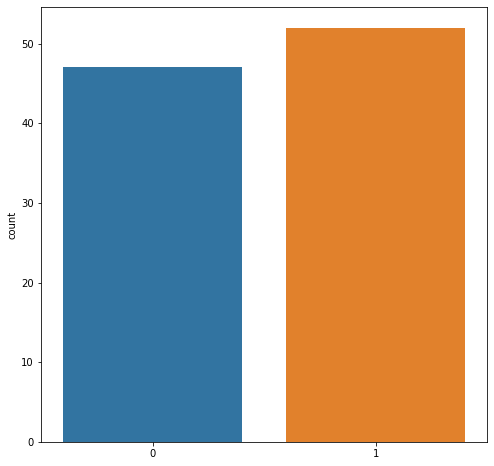

In [20]:
import seaborn as sns
ax = sns.countplot(x=y2, data=df1)
print(df1['s2'].value_counts())
#plt.savefig('s2-1.jpg',dpi=1200)
#plt.show()

In [21]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_std = stdsc.fit_transform(X)
print(X_std.shape)

(99, 48)


Accuracy: 100.00 % 


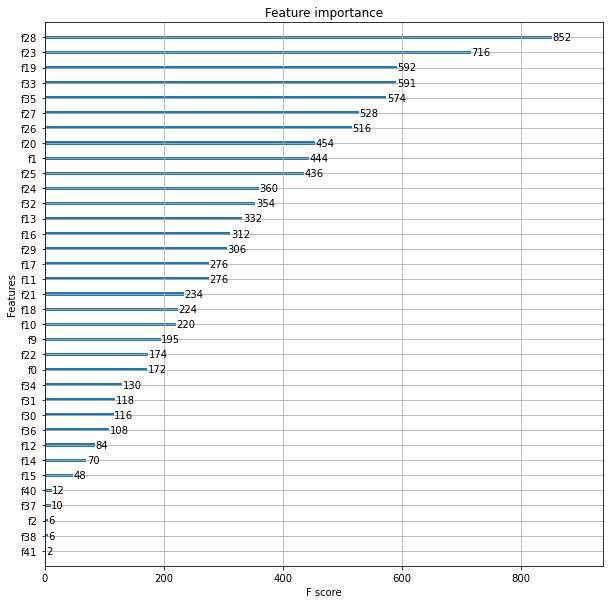

In [22]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
# set XGBoost's parameters
params = {
    'booster': 'gbtree',
    #'objective': 'binary:hinge',  #'binary:logistic', 
    'objective':'multi:softmax',
    'eval_metric':'auc',
    'num_class': 2, 
    #'gamma': 0.1,
    'max_depth': 10,
    #'alpha':1,
    'lambda': 1,
    #'subsample': 1,
    #'colsample_bytree': 1,
    #'min_child_weight': 3,
    #'scale_pos_weight':4,
    #'silent': 1,
    'eta': 0.01,
    'seed': 100,
    #'nthread': 4,    
}

plst = params.items()
# trian
dtrain = xgb.DMatrix(X_std, y2) #几个地方别忘了改
num_rounds = 500
model = xgb.train(plst, dtrain, num_rounds)

# test
dtest = xgb.DMatrix(X_std)
ans = model.predict(dtest)

# calculate
cnt1 = 0
cnt2 = 0
for i in range(len(y2)): #几个地方别忘了改
    if ans[i] == y2[i]:  #几个地方别忘了改
        cnt1 += 1
    else:
        cnt2 += 1

print("Accuracy: %.2f %% " % (100 * cnt1 / (cnt1 + cnt2)))

# show the importance, for feature selection
xgb.plot_importance(model, importance_type='weight')
#plt.savefig('fig2-new.jpg',dpi=1200)
plt.show()

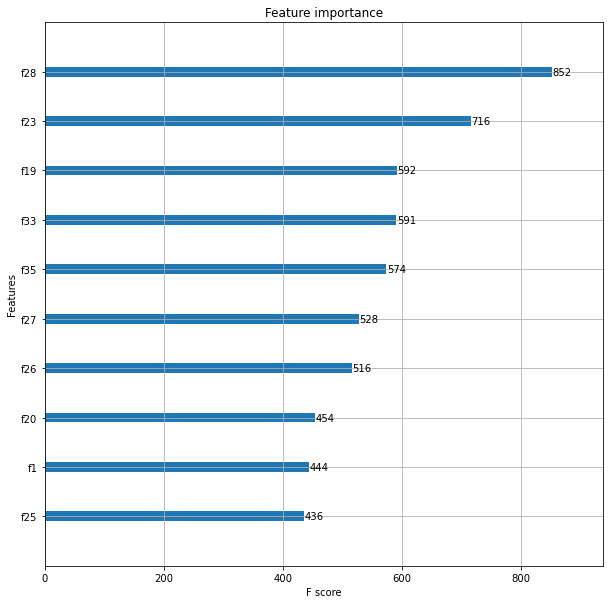

In [23]:
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
xgb.plot_importance(model,max_num_features=10, importance_type='weight') #or gain, cover.
#plt.savefig('s2-2.jpg',dpi=1200)
#plt.show()

In [24]:
feat_labels[[28,23,19,33,35,27,26,20,1,25]]

Index(['AAOW', 'rvotL', 'SLPA', 'LVS', 'RVW', 'AAOD', 'Aorticriderate', 'SRPA',
       'sex', 'VSD'],
      dtype='object')

In [25]:
X2 = X_std[:, [28,23,19,33,35,27,26,20,1,25]]
y2 = y2
print(X2.shape)
print(y2.shape)

(99, 10)
(99,)


In [26]:
clf1 = svm.SVC(probability=True, random_state=1)

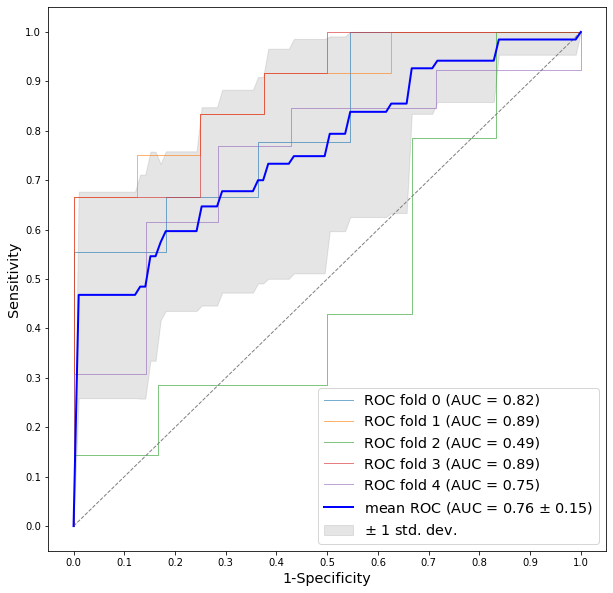

In [27]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import model_selection
from scipy import interp
import matplotlib
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import auc, f1_score, roc_auc_score, roc_curve
from pylab import rcParams

cv = model_selection.ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 1)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
i = 0
plt.xticks(np.arange(0, 1.1, step=0.1))
plt.yticks(np.arange(0, 1.1, step=0.1))
matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)

for train, test in cv.split(X2, y2):                                      #几个地方别忘了改
    probas_ = clf1.fit(X2[train], y2[train]).predict_proba(X2[test])      #几个地方别忘了改
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y2[test], probas_[:, 1])             #几个地方别忘了改
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    #optimal_th, optimal_point = Find_Optimal_Cutoff(TPR=tpr, FPR=fpr, threshold=thresholds) ###
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.6,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1

plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=1)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
#optimal_th, optimal_point = Find_Optimal_Cutoff(TPR=mean_tpr, mean_fpr, threshold=thresholds)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',label=r'mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)

#################################################################
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,label=r'$\pm$ 1 std. dev.')
#plt.xlim([-0, 1])
#plt.ylim([-0, 1])
plt.xlabel('1-Specificity', fontsize = 'x-large')
plt.ylabel('Sensitivity', fontsize = 'x-large')
#plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right" ,
           fontsize = 'x-large'
          )
#plt.plot(optimal_point[0], optimal_point[1], marker='o', color='r')
#plt.text(optimal_point[0], optimal_point[1], f'Threshold:{optimal_th:.2f}')

#plt.savefig('s2-3.jpg',dpi=1200)
plt.show()

## For S3

In [28]:
from sklearn.preprocessing import LabelEncoder
df1['s3'] = df1['s3'].map(class_mapping)
y3 = LabelEncoder().fit_transform(df1['s3'].values)
X = df1.iloc[:, 1:49].values
print(y3.shape)
print(X.shape)

(99,)
(99, 48)


0    58
1    41
Name: s3, dtype: int64


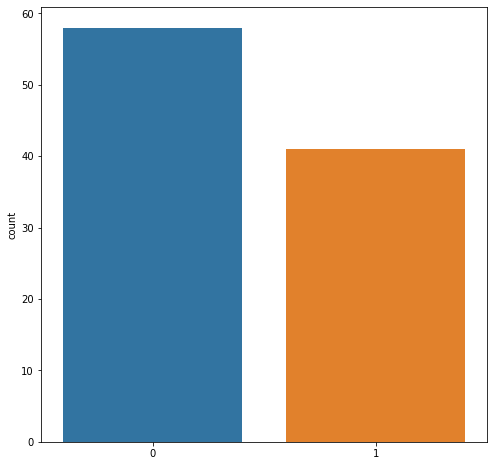

In [29]:
import seaborn as sns
ax = sns.countplot(x=y3, data=df1)
print(df1['s3'].value_counts())
#plt.savefig('s3-1.jpg',dpi=1200)
#plt.show()

In [30]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_std = stdsc.fit_transform(X)
print(X_std.shape)

(99, 48)


Accuracy: 100.00 % 


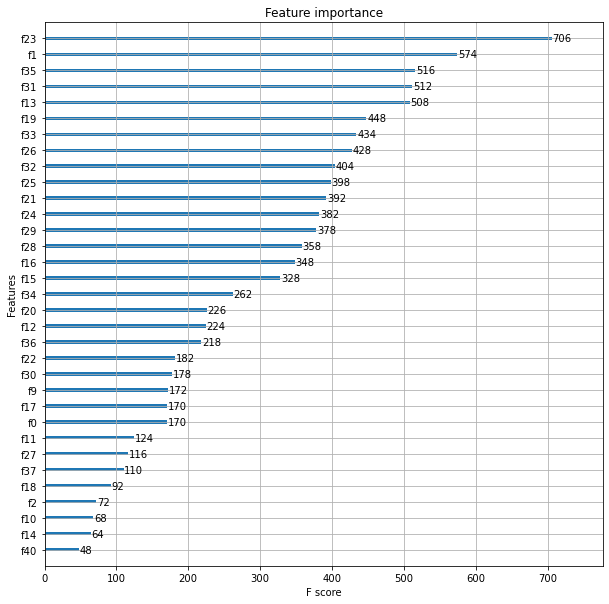

In [31]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
# set XGBoost's parameters
params = {
    'booster': 'gbtree',
    #'objective': 'binary:hinge',  #'binary:logistic', 
    'objective':'multi:softmax',
    'eval_metric':'auc',
    'num_class': 2, 
    #'gamma': 0.1,
    'max_depth': 10,
    #'alpha':1,
    'lambda': 1,
    #'subsample': 1,
    #'colsample_bytree': 1,
    #'min_child_weight': 3,
    #'scale_pos_weight':4,
    #'silent': 1,
    'eta': 0.01,
    'seed': 100,
    #'nthread': 4,    
}

plst = params.items()
# trian
dtrain = xgb.DMatrix(X_std, y3) #几个地方别忘了改
num_rounds = 500
model = xgb.train(plst, dtrain, num_rounds)

# test
dtest = xgb.DMatrix(X_std)
ans = model.predict(dtest)

# calculate
cnt1 = 0
cnt2 = 0
for i in range(len(y3)): #几个地方别忘了改
    if ans[i] == y3[i]:  #几个地方别忘了改
        cnt1 += 1
    else:
        cnt2 += 1

print("Accuracy: %.2f %% " % (100 * cnt1 / (cnt1 + cnt2)))

# show the importance, for feature selection
xgb.plot_importance(model, importance_type='weight')
#plt.savefig('fig2-new.jpg',dpi=1200)
plt.show()

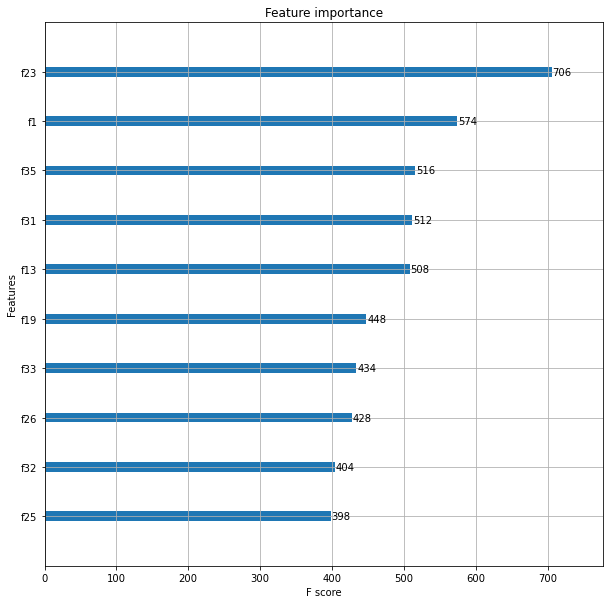

In [32]:
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
xgb.plot_importance(model,max_num_features=10, importance_type='weight') #or gain, cover.
plt.savefig('s3-2.jpg',dpi=1200)
plt.show()

In [33]:
feat_labels[[23,1,35,31,13,19,33,26,32,25]]

Index(['rvotL', 'sex', 'RVW', 'TVD', 'HR', 'SLPA', 'LVS', 'Aorticriderate',
       'LV L', 'VSD'],
      dtype='object')

In [34]:
X3 = X_std[:, [23,1,35,31,13,19,33,26,32,25]]
y3 = y3
print(X3.shape)
print(y3.shape)

(99, 10)
(99,)


In [35]:
clf1 = svm.SVC(probability=True, random_state=1)

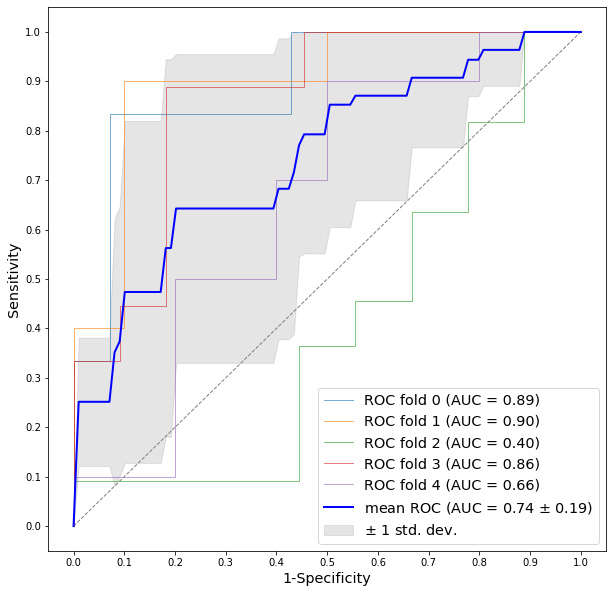

In [36]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import model_selection
from scipy import interp
import matplotlib
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import auc, f1_score, roc_auc_score, roc_curve
from pylab import rcParams

cv = model_selection.ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 1)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
i = 0
plt.xticks(np.arange(0, 1.1, step=0.1))
plt.yticks(np.arange(0, 1.1, step=0.1))
matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)

for train, test in cv.split(X3, y3):                                      #几个地方别忘了改
    probas_ = clf1.fit(X3[train], y3[train]).predict_proba(X3[test])      #几个地方别忘了改
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y3[test], probas_[:, 1])             #几个地方别忘了改
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    #optimal_th, optimal_point = Find_Optimal_Cutoff(TPR=tpr, FPR=fpr, threshold=thresholds) ###
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.6,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1

plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=1)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
#optimal_th, optimal_point = Find_Optimal_Cutoff(TPR=mean_tpr, mean_fpr, threshold=thresholds)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',label=r'mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)

#################################################################
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,label=r'$\pm$ 1 std. dev.')
#plt.xlim([-0, 1])
#plt.ylim([-0, 1])
plt.xlabel('1-Specificity', fontsize = 'x-large')
plt.ylabel('Sensitivity', fontsize = 'x-large')
#plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right" ,
           fontsize = 'x-large'
          )
#plt.plot(optimal_point[0], optimal_point[1], marker='o', color='r')
#plt.text(optimal_point[0], optimal_point[1], f'Threshold:{optimal_th:.2f}')

#plt.savefig('s3-3.jpg',dpi=1200)
plt.show()

## For S4

### multi-cla is different from two-cla

In [37]:
X = df1.iloc[:, 1:49].values
y4 = df1["s4"].values
print(y4.shape)
print(X.shape)

(99,)
(99, 48)


In [38]:
y4

array([3, 3, 3, 0, 0, 0, 0, 1, 3, 0, 3, 3, 1, 0, 0, 1, 0, 3, 1, 1, 3, 1,
       2, 0, 3, 1, 1, 3, 3, 0, 1, 1, 2, 0, 3, 0, 3, 3, 3, 0, 1, 2, 3, 1,
       2, 2, 0, 1, 2, 3, 3, 3, 0, 3, 0, 3, 2, 3, 1, 2, 2, 1, 1, 3, 3, 3,
       1, 3, 3, 1, 3, 1, 3, 1, 2, 3, 3, 0, 0, 3, 3, 3, 2, 1, 0, 3, 0, 0,
       3, 1, 3, 1, 3, 3, 1, 3, 3, 1, 0], dtype=int64)

3    41
1    25
0    22
2    11
Name: s4, dtype: int64


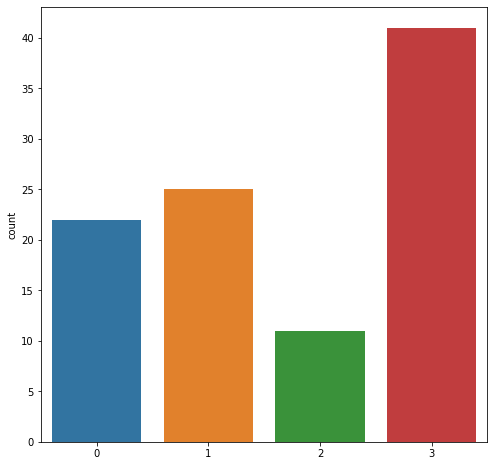

In [39]:
ax = sns.countplot(x=y4, data=df1)
print(df1['s4'].value_counts())
#plt.savefig('s4-1.jpg',dpi=1200)
#plt.show()

In [40]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_std = stdsc.fit_transform(X)
print(X_std.shape)

(99, 48)


Accuracy: 100.00 % 


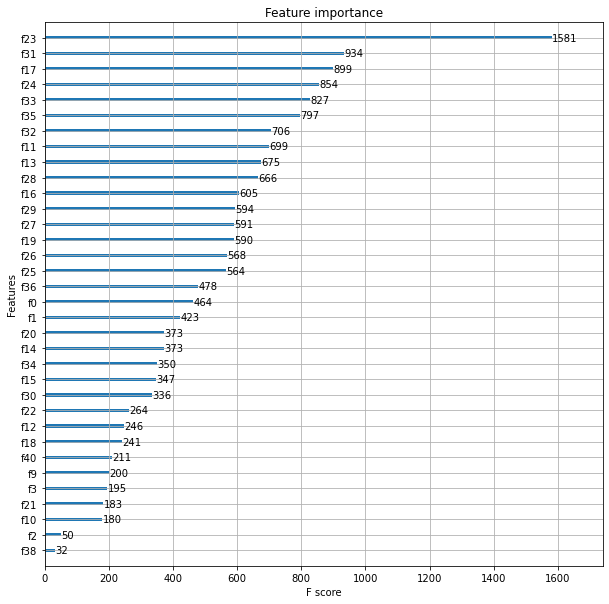

In [41]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
# set XGBoost's parameters
params = {
    'booster': 'gbtree',
    #'objective': 'binary:hinge',  #'binary:logistic', 
    'objective':'multi:softmax',
    'eval_metric':'auc',
    'num_class': 4,             #几个地方别忘了改
    #'gamma': 0.1,
    'max_depth': 10,
    #'alpha':1,
    'lambda': 1,
    #'subsample': 1,
    #'colsample_bytree': 1,
    #'min_child_weight': 3,
    #'scale_pos_weight':4,
    #'silent': 1,
    'eta': 0.01,
    'seed': 100,
    #'nthread': 4,    
}

plst = params.items()
# trian
dtrain = xgb.DMatrix(X_std, y4) #几个地方别忘了改
num_rounds = 500
model = xgb.train(plst, dtrain, num_rounds)

# test
dtest = xgb.DMatrix(X_std)
ans = model.predict(dtest)

# calculate
cnt1 = 0
cnt2 = 0
for i in range(len(y4)): #几个地方别忘了改
    if ans[i] == y4[i]:  #几个地方别忘了改
        cnt1 += 1
    else:
        cnt2 += 1

print("Accuracy: %.2f %% " % (100 * cnt1 / (cnt1 + cnt2)))

# show the importance, for feature selection
xgb.plot_importance(model, importance_type='weight')
#plt.savefig('fig2-new.jpg',dpi=1200)
plt.show()

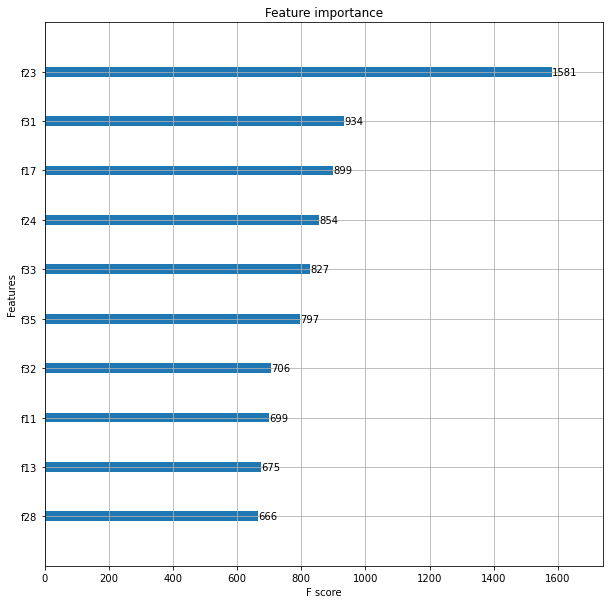

In [42]:
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
xgb.plot_importance(model,max_num_features=10, importance_type='weight') #or gain, cover.
plt.savefig('s4-2.jpg',dpi=1200)
plt.show()

In [43]:
feat_labels[[23,31,17,24,33,35,32,11,13,28]]

Index(['rvotL', 'TVD', 'LPA', 'rvotS', 'LVS', 'RVW', 'LV L', 'BMI', 'HR',
       'AAOW'],
      dtype='object')

In [44]:
X4 = X_std[:, [23,31,17,24,33,35,32,11,13,28]]
y4 = y4
print(X4.shape)
print(y4.shape)

(99, 10)
(99,)


In [45]:
clf1 = svm.SVC(probability=True, random_state=1)

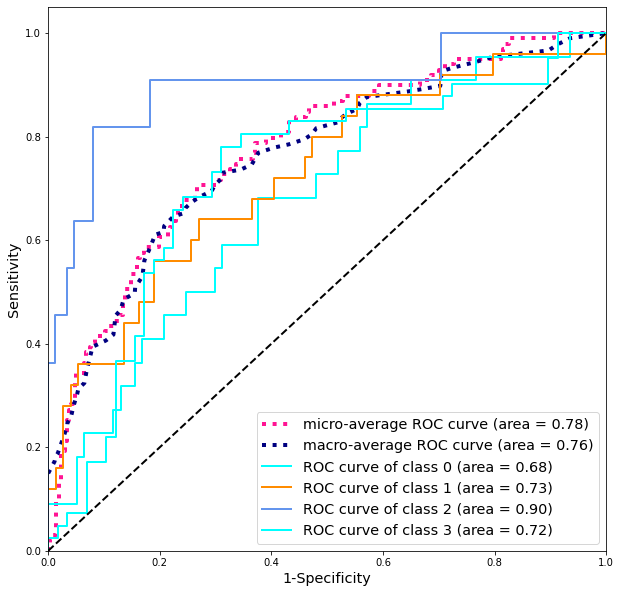

In [48]:
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

y4 = label_binarize(y4, classes=[0, 1, 2, 3])
# 设置种类
n_classes = y4.shape[1]

# 训练模型并预测
random_state = np.random.RandomState(1)
n_samples, n_features = X4.shape

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X4, y4, test_size = 0.2, random_state=1)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X4, y4).decision_function(X4)

# 计算每一类的ROC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y4[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area（方法二）
fpr["micro"], tpr["micro"], _ = roc_curve(y4.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area（方法一）
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
# Finally average it and compute AUC
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
lw=2
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity', fontsize = 'x-large')
plt.ylabel('Sensitivity', fontsize = 'x-large')
#plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right" , fontsize = 'x-large')
#plt.savefig('s4-3.jpg',dpi=1200)
plt.show()